<a href="https://colab.research.google.com/github/fia27/fiaspace/blob/master/projectdqlab/airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# A.1 installing package
!pip install pandas
!pip install pandasql
!pip install --upgrade 'sqlalchemy <2.0'
!pip install plotly
#!pip install dash
!pip install jupyter-dash

In [8]:
# Library data manipulation
import pandas as pd
import pandasql as ps

# Library Data Visualization
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

# Library Dashboarding
from jupyter_dash import JupyterDash
from dash import html, dcc, Input, Output

In [9]:
!git clone https://github.com/fia27/fiaspace.git

fatal: destination path 'fiaspace' already exists and is not an empty directory.


In [26]:
filepath1 = "./fiaspace/project/DQLab_listings(22Sep2022) (1).csv"
datalist = pd.read_csv(filepath1)
datalist.drop(['Unnamed: 0'], axis=1, inplace=True)

In [16]:
filepath2 = "./fiaspace/project/DQLab_nieghbourhood(22Sep2022).csv"
dataneg = pd.read_csv(filepath2)
dataneg.drop(['Unnamed: 0'], axis=1, inplace=True)

In [19]:
filepath3 = "./fiaspace/project/DQLab_reviews(22Sep2022).csv"
datarev = pd.read_csv(filepath3)
datarev.rename(columns={'listing_id': 'id'}, inplace = True)
datarev.drop(['Unnamed: 0'], axis=1, inplace=True)

In [36]:
#join1 = datalist.set_index('id').join(datarev.set_index('id'), how='inner')
join1 = pd.merge(datalist, datarev, on='id')
merged_all = pd.merge(join1, dataneg, on='neighbourhood')

In [50]:
merged_all['date'] = pd.to_datetime(merged_all['date'])

In [53]:
merged_all.isnull().sum()

id                     0
name                   0
host_id                0
host_name              0
neighbourhood          0
latitude               0
longitude              0
room_type              0
price                  0
minimum_nights         0
availability_365       0
date                   0
neighbourhood_group    0
dtype: int64

In [48]:
multiagg = merged_all.groupby('neighbourhood').agg(['min','median','mean', 'max'])
multiagg

<ipython-input-48-3255519cbcb7>:1: FutureWarning: ['name', 'host_name', 'room_type', 'date', 'neighbourhood_group'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  multiagg = merged_all.groupby('neighbourhood').agg(['min','median','mean', 'max'])


id                              \
                                        min        median          mean   
neighbourhood                                                             
Ang Mo Kio                          5040689  1.273890e+07  7.785106e+16   
Bedok                               2129215  1.794959e+07  5.338520e+15   
Bishan                              4926170  2.086502e+07  2.534608e+07   
Bukit Batok                         9216943  2.257790e+07  2.073943e+07   
Bukit Merah                          275344  2.470771e+07  6.153863e+15   
Bukit Panjang                      15775439  4.081659e+07  3.670337e+07   
Bukit Timah                         5551665  2.088834e+07  2.635894e+15   
Central Water Catchment            36009935  3.643124e+07  3.888538e+07   
Choa Chu Kang                      21037930  2.634421e+07  7.660447e+15   
Clementi                            6529707  1.890520e+07  2.903566e+16   
Downtown Core                        747813  4.241729e+07  6.266826e+16   
Geylang                             4360679  2.266645e+07  1.573287e+16   
Hougang                             2156372  1.197240e+07  1.510791e+07   
Jurong East                         7250803  2.345726e+07  2.441403e+07   
Jurong West                         9281075  2.929523e+07  8.966527e+15   
Kallang                              962594  1.689196e+07  2.528781e+15   
Lim Chu Kang                        9223088  3.159919e+07  5.065654e+16   
Marina South                       51122058  5.112206e+07  5.133275e+07   
Marine Parade                        756267  3.068720e+07  1.830132e+15   
Museum                              3075620  2.244200e+07  8.430936e+15   
Newton                               294281  1.805248e+07  2.030718e+15   
North-Eastern Islands    540170321699689740  5.401703e+17  5.401703e+17   
Novena                               982909  1.419189e+07  6.686799e+15   
Orchard                            16750061  1.959532e+07  2.146527e+07   
Outram                               765579  1.820240e+07  1.595544e+16   
Pasir Ris                           1495386  2.245465e+07  2.385721e+16   
Punggol                             7766300  1.424574e+07  1.743540e+07   
Queenstown                          2922184  2.485717e+07  3.768227e+16   
River Valley                        1024986  1.684883e+07  9.564861e+16   
Rochor                              1654840  3.363455e+07  1.460207e+16   
Sembawang                           6603464  5.233303e+07  4.347564e+16   
Sengkang                           36570785  3.657078e+07  3.862954e+07   
Serangoon                           4486217  2.528286e+07  2.382283e+07   
Singapore River                     4541183  1.792817e+07  2.997482e+16   
Southern Islands                   47912755  6.690279e+17  5.795705e+17   
Sungei Kadut                       22499652  2.454578e+07  3.034727e+07   
Tampines                              71609  5.827998e+06  8.598952e+14   
Tanglin                             8061522  3.424374e+07  1.730711e+17   
Toa Payoh                           4541072  3.129596e+07  2.110753e+16   
Western Water Catchment             8257433  3.796560e+07  1.121210e+17   
Woodlands                           5417617  3.616936e+07  5.563043e+16   
Yishun                              7666349  4.254536e+07  3.273173e+07   

                                               host_id               \
                                        max        min       median   
neighbourhood                                                         
Ang Mo Kio               700659496886425856   11463785   22554193.0   
Bedok                    706180793818067116    7642747   68059127.0   
Bishan                             54154999    5092893  104765359.0   
Bukit Batok                        28198324   15040015   15040015.0   
Bukit Merah              658336525634296818    1439258  186405513.0   
Bukit Panjang                      41112238    6689302  115788804.0   
Bukit Timah              6

In [41]:
# [8] Create sebuah function: iqr
def iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    return Q3 - Q1

# [8] GROUPING berdasarkan lokasi dan terapkan aggregasi: iqr
custom_agg = merged_all.groupby('neighbourhood').agg(iqr)
custom_agg

<ipython-input-41-cc7982ed8eb6>:8: FutureWarning: ['name', 'host_name', 'room_type', 'date', 'neighbourhood_group'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  custom_agg = merged_all.groupby('neighbourhood').agg(iqr)


,id,host_id,latitude,longitude,price,minimum_nights,availability_365
neighbourhood,,,,,,,
Ang Mo Kio,0.000000e+00,0.0,0.000147,0.008172,0.00,88.0,0.00
Bedok,1.550738e+07,83920912.0,0.002280,0.013860,97.00,0.0,138.00
Bishan,1.262563e+07,116481155.0,0.004020,0.006540,129.00,0.0,228.00
Bukit Batok,3.377465e+06,13783291.5,0.013575,0.002040,171.00,0.0,296.00
Bukit Merah,1.325730e+07,10649770.0,0.009820,0.001270,122.50,0.0,347.00
Bukit Panjang,4.486070e+05,133587696.0,0.006150,0.002207,13.75,22.0,35.00
Bukit Timah,1.721083e+06,134459056.0,0.007650,0.037390,48.00,0.0,3.00
Central Water Catchment,3.296750e+06,20620494.0,0.000475,0.001375,333.25,0.0,0.00
Choa Chu Kang,8.985964e+06,51053748.0,0.013000,0.000990,17.00,0.0,108.00


In [42]:
# Basic statistics
num_listings = len(merged_all)
average_price = merged_all['price'].mean()
min_price = merged_all['price'].min()
max_price = merged_all['price'].max()

print('Number of Listings:', num_listings)
print('Average Price:', average_price)
print('Minimum Price:', min_price)
print('Maximum Price:', max_price)

Number of Listings: 49695
Average Price: 116.39762551564544
Minimum Price: 15
Maximum Price: 12494


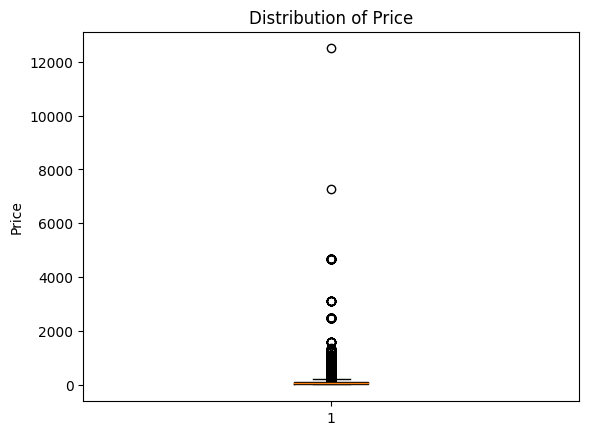

In [44]:
price_data = merged_all['price']

# Create the box plot
plt.boxplot(price_data)
plt.ylabel('Price')
plt.title('Distribution of Price')
plt.show()

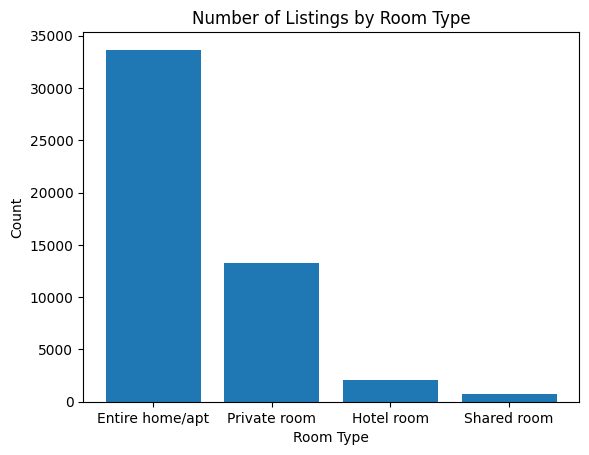

In [45]:
# Bar chart of room types
room_type_counts = merged_all['room_type'].value_counts()
plt.bar(room_type_counts.index, room_type_counts.values)
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.title('Number of Listings by Room Type')
plt.show()

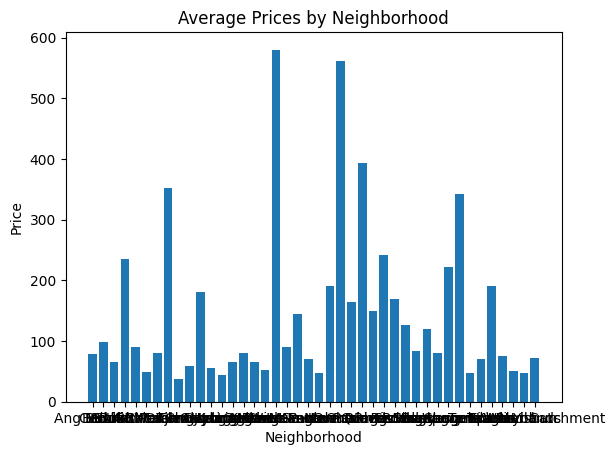

In [46]:
# Calculate average prices by neighborhood
neighborhood_prices = merged_all.groupby('neighbourhood')['price'].median()
plt.bar(neighborhood_prices.index, neighborhood_prices.values)
plt.xlabel('Neighborhood')
plt.ylabel('Price')
plt.title('Average Prices by Neighborhood')
plt.show()

In [47]:
# Identify popular neighborhoods
top_neighborhoods = merged_all['neighbourhood'].value_counts().head(5)
# Identify the most expensive neighborhood
most_expensive_neighborhood = neighborhood_prices.idxmax()

print('Top 5 Neighborhoods:\n', top_neighborhoods)
print('Most Expensive Neighborhood:', most_expensive_neighborhood)

Top 5 Neighborhoods:
 Woodlands                  20095
Western Water Catchment     4551
Kallang                     2984
Downtown Core               2756
Rochor                      2707
Name: neighbourhood, dtype: int64
Most Expensive Neighborhood: Marina South


In [ ]:
start_date = '2022-01-01'  # Start date of the trend
end_date = '2022-12-31'  # End date of the trend
num_points = 365  # Number of data points
intercept = 100  # Y-intercept of the trend line
slope = 0.5  # Slope of the trend line

In [ ]:
merged_all.head(600000)